# Analysing causes of cancer

### SEN163B - Responsible Data Analytics

Welcome to our code. We are:
- Allegra Melli 6104916, 
- Ann-Kathrin Peitz 6069819, 
- Julian Jahangir 5176379, 
- Jurriaan van Lanschot 4929357, 
- Tim Hol 4487346. 

We hope it contains everything required. If there are any questions please feel free to contact us. Kind regards, group 1.

# 0 - Setting up and importing the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

cancer_df = pd.read_excel('Project_Data/cancer patient data sets.xlsx')

# 1 - Exploring the Cancer data

In [3]:
# The imported dataset in a dataframe
cancer_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,3
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,3
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,3
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3


In [4]:
# Exploring all columns
cancer_df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

### 1.1 Data Cleaning and Prepocessing

# 2 - Descriptive Analytics

For the descriptive analytics some fundamental lifestyle and demographic characteristics are investigated, which are considered important by literature. Both because these characteristics might serve later as good predictors, but also because these characteristics can be considered as variables that are potentially sensitive to biases. Therefore, it is important to study their prevalence in the dataset, so the potential impacts and later potential relations with other variables can be accounted for.

### 2.1 Age and gender distributions

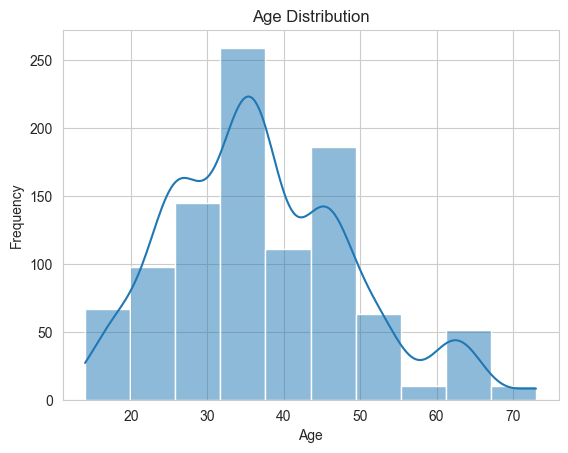

In [5]:
# Observing the age distribution within the dataset
sns.histplot(cancer_df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

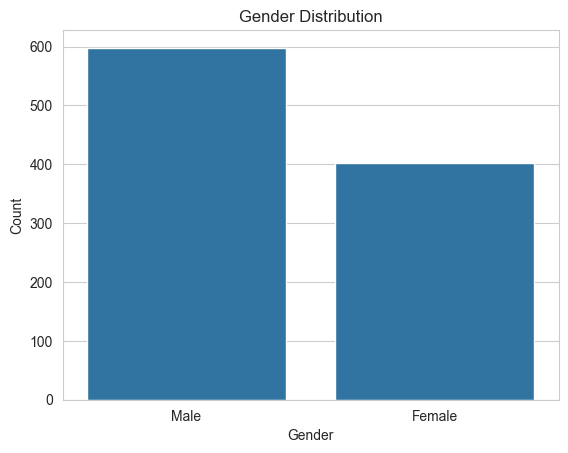

In [6]:
# The Gender distribution of the dataset
sns.countplot(x='Gender', data=cancer_df)
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

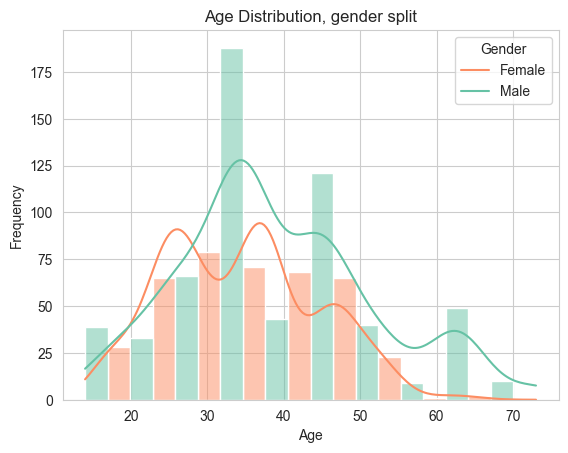

In [7]:
# Observing the age and gender distribution within the dataset
age_gender_plot = sns.histplot(data=cancer_df, x='Age', hue='Gender', multiple='dodge', bins=10, kde=True, palette='Set2')
plt.title('Age Distribution, gender split')
plt.xlabel('Age')
plt.ylabel('Frequency')
age_gender_plot.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

### 2.2 - Disease Severity

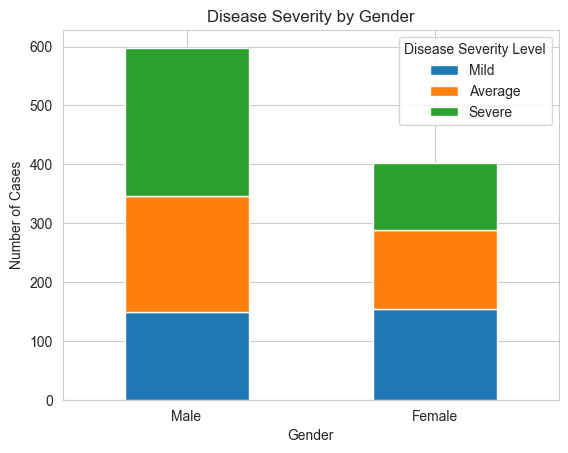

In [8]:
# Amount of cases and their severity vs the gender division
pd.crosstab(cancer_df['Gender'], cancer_df['Level']).plot(kind='bar', stacked=True)
plt.title('Disease Severity by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe'])

C:\Users\TimEW\AppData\Local\Temp\ipykernel_1784\3144795678.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  level_gender_plot.set_xticklabels(['Mild', 'Average', 'Severe'])


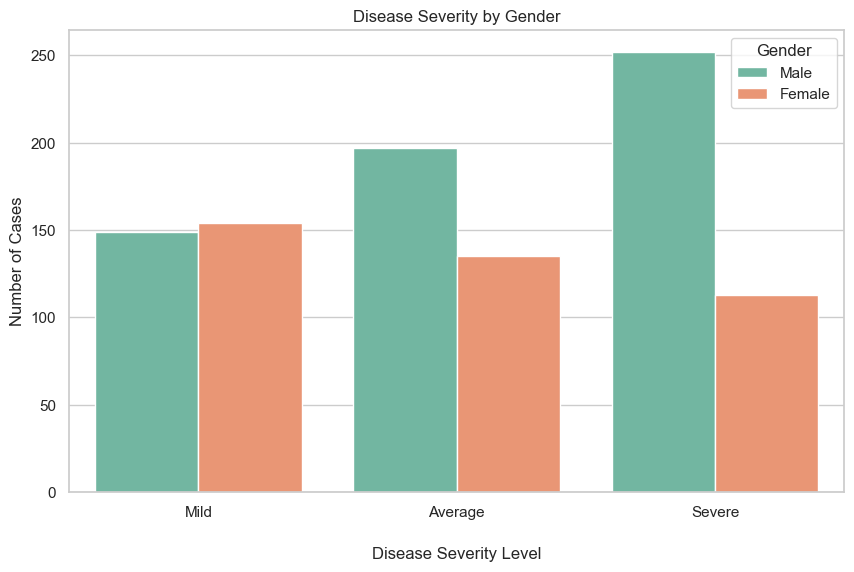

In [9]:
# Level of disease severity by gender, split per level
# Assuming CancerData is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Assuming 'Gender' is the column name for gender
level_gender_plot = sns.countplot(data=cancer_df, x='Level', hue='Gender', palette='Set2')

plt.title('Disease Severity by Gender')
plt.xlabel('Disease Severity Level', labelpad=20)
level_gender_plot.set_xticklabels(['Mild', 'Average', 'Severe'])
plt.ylabel('Number of Cases')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

C:\Users\TimEW\AppData\Local\Temp\ipykernel_1784\2659166407.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  age_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])


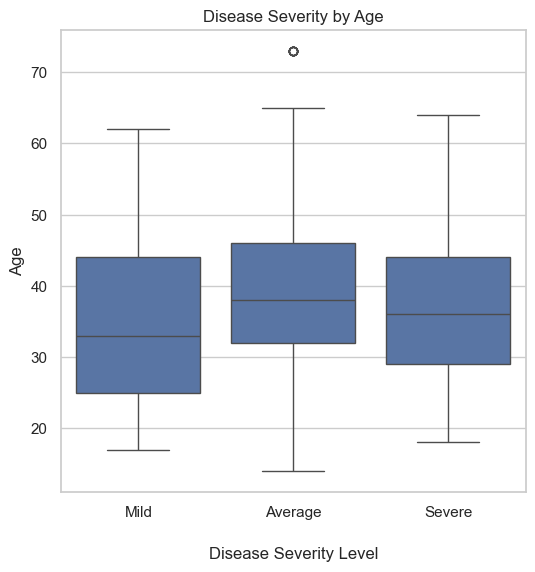

In [10]:
# Disease Severity by age
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

age_level_plot = sns.boxplot(data=cancer_df, x = 'Level', y = 'Age')
plt.title('Disease Severity by Age')
age_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])
plt.xlabel('Disease Severity Level', labelpad=20)
plt.ylabel('Age')
plt.show()

C:\Users\TimEW\AppData\Local\Temp\ipykernel_1784\3331058251.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  age_gender_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])


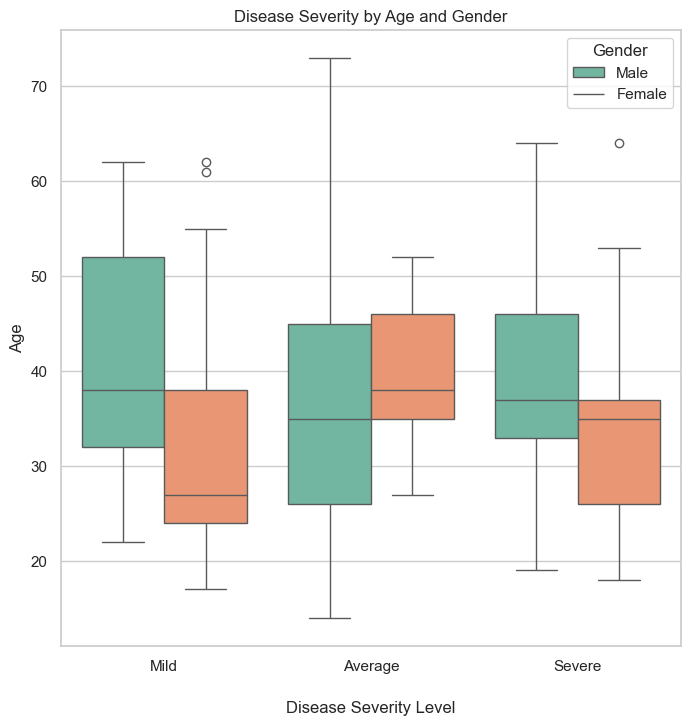

In [11]:
# Disease Severity by gender and age
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

age_gender_level_plot = sns.boxplot(data=cancer_df, x = 'Level', y = 'Age', hue='Gender', palette='Set2', legend='full')
plt.title('Disease Severity by Age and Gender')
age_gender_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])
plt.xlabel('Disease Severity Level', labelpad=20)
plt.ylabel('Age')
age_gender_level_plot.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

### 2.3 Smoking distributions

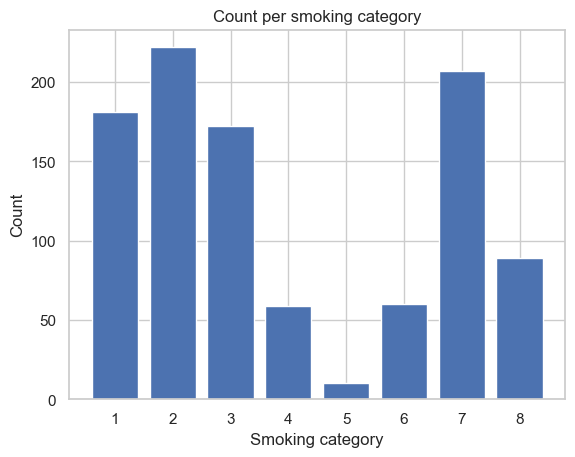

In [12]:
# Count occurrences of each unique value in the 'Smoking' column
smoking_counts = cancer_df['Smoking'].value_counts()

# Plotting
plt.bar(smoking_counts.index, smoking_counts.values)  # Adjust colors if needed
plt.xlabel('Smoking category')
plt.ylabel('Count')
plt.title('Count per smoking category')
plt.show()

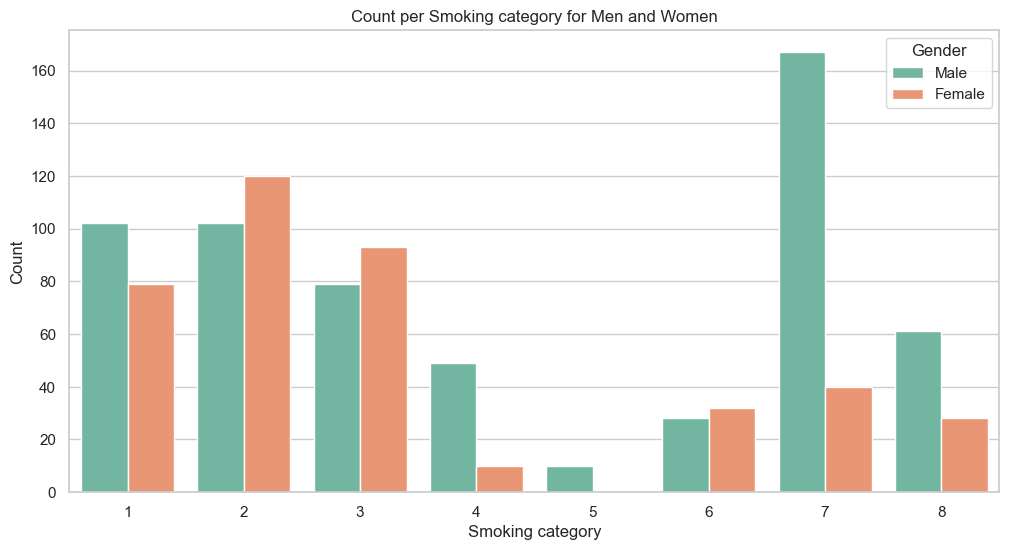

In [13]:
# Smoking category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Assuming 'Gender' is the column name for gender
sns.countplot(data=cancer_df, x='Smoking', hue='Gender', palette='Set2')

plt.xlabel('Smoking category')
plt.ylabel('Count')
plt.title('Count per Smoking category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

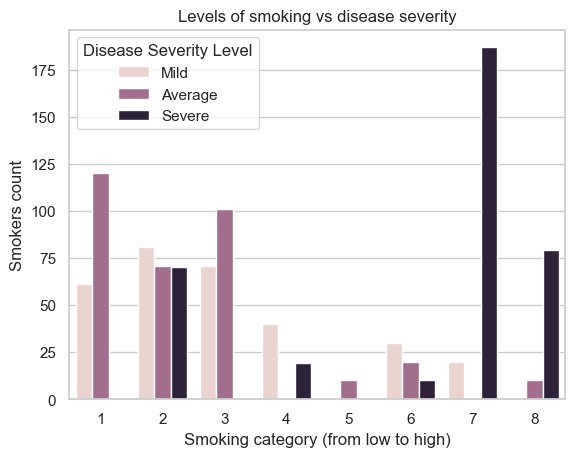

In [14]:
# Smoking level vs Disease Severity
sns.countplot(data=cancer_df, x = 'Smoking', hue = 'Level')
plt.title('Levels of smoking vs disease severity')
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe', ])
plt.xlabel('Smoking category (from low to high)')
plt.ylabel('Smokers count')
plt.show()

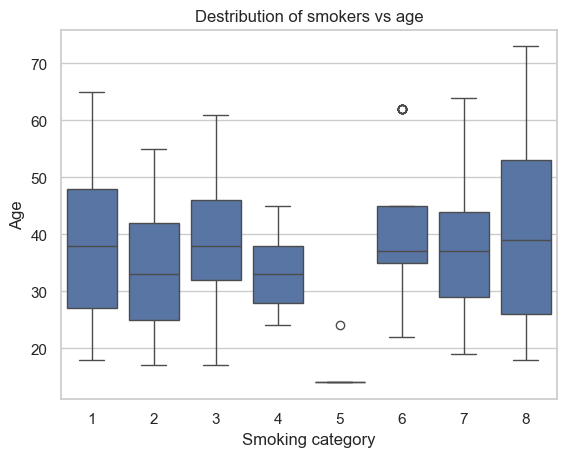

In [15]:
# Smoking level vs age
smoke_age_plot = sns.boxplot(data=cancer_df, x='Smoking', y='Age')
plt.title('Destribution of smokers vs age')
plt.xlabel('Smoking category')
plt.show()

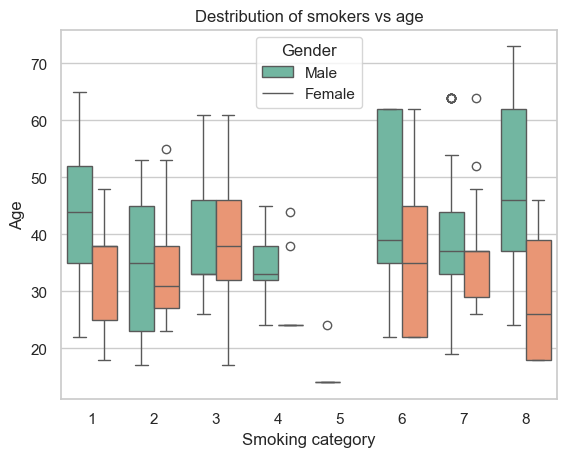

In [16]:
# Smoking level vs age
smoke_age_plot = sns.boxplot(data=cancer_df, x='Smoking', y='Age', hue='Gender', palette='Set2')
plt.title('Destribution of smokers vs age')
plt.xlabel('Smoking category')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

### 2.4 Air pollution

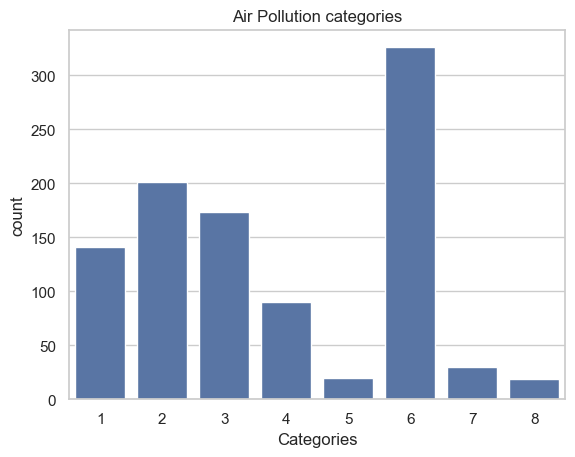

In [28]:
sns.countplot(data=cancer_df, x='Air Pollution')
plt.title('Air Pollution categories')
plt.xlabel('Categories')
plt.show()

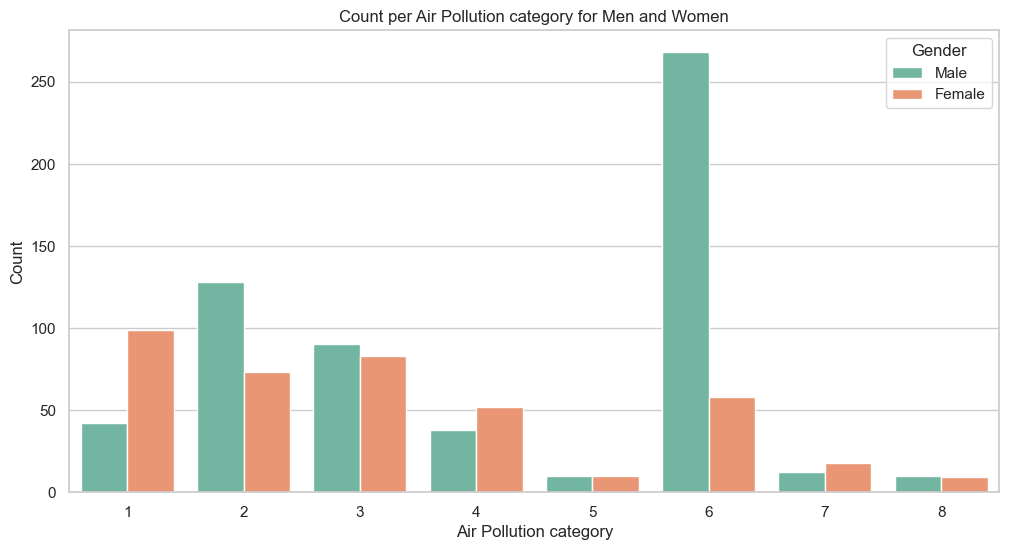

In [29]:
# Air pollution category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Assuming 'Gender' is the column name for gender
sns.countplot(data=cancer_df, x='Air Pollution', hue='Gender', palette='Set2')

plt.xlabel('Air Pollution category')
plt.ylabel('Count')
plt.title('Count per Air Pollution category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

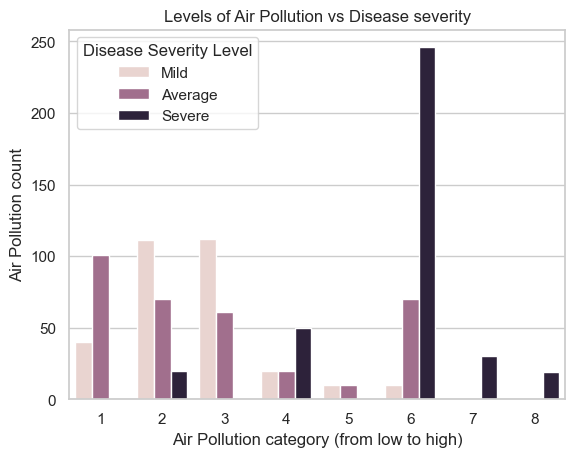

In [30]:
# air pollution level vs Disease Severity
sns.countplot(data=cancer_df, x = 'Air Pollution', hue = 'Level')
plt.title('Levels of Air Pollution vs Disease severity')
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe'])
plt.xlabel('Air Pollution category (from low to high)')
plt.ylabel('Air Pollution count')
plt.show()

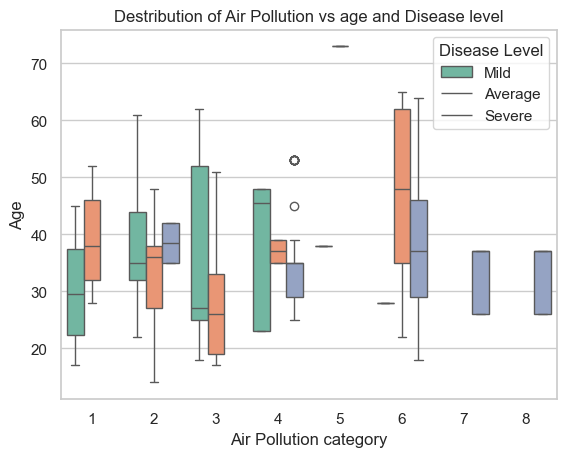

In [31]:
# Air pollution level vs age
air_age_plot = sns.boxplot(data=cancer_df, x='Air Pollution', y='Age', hue='Level', palette='Set2')
plt.title('Destribution of Air Pollution vs age and Disease level')
plt.xlabel('Air Pollution category')
plt.legend(title='Disease Level', labels=['Mild', 'Average', 'Severe'])
plt.show()

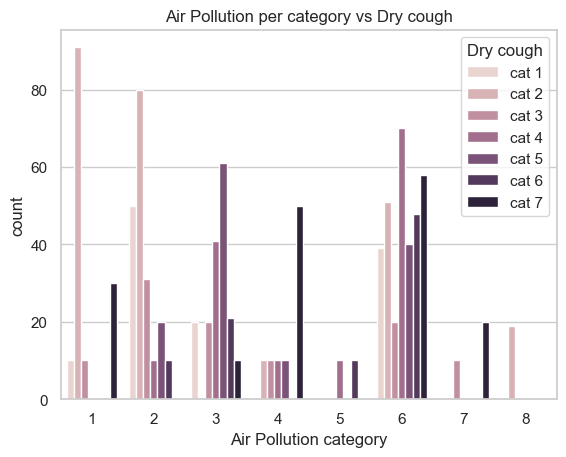

In [34]:
# Air pollution level vs dry cough
air_cough_plot = sns.countplot(data=cancer_df, x='Air Pollution', hue='Dry Cough')
plt.title('Air Pollution per category vs Dry cough')
plt.xlabel('Air Pollution category')
plt.legend(title='Dry cough', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'])
plt.show()

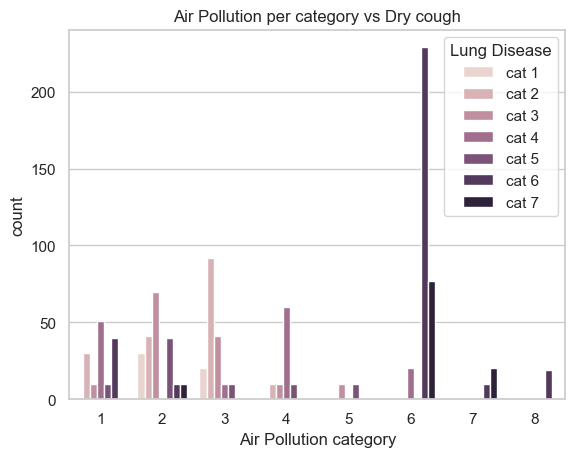

In [38]:
# Air pollution level vs dry cough
air_lung_plot = sns.countplot(data=cancer_df, x='Air Pollution', hue='chronic Lung Disease')
plt.title('Air Pollution per category vs Dry cough')
plt.xlabel('Air Pollution category')
plt.legend(title='Lung Disease', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'])
plt.show()

### 2.5 Obesity

### 2.6 Genetic Risk